In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [3]:
# 2. Đọc file csv
# company_csv = '/content/drive/MyDrive/Colab Notebooks/Datacrawl/IMP.csv'
company_csv = '/content/drive/MyDrive/Colab Notebooks/Datacrawl/OPC.csv'
# company_csv = '/content/drive/MyDrive/Colab Notebooks/Datacrawl/VMD.csv'
data = pd.read_csv(company_csv)
data

,Unnamed: 0,time,open,high,low,close,volume,ticker
0,0,2014-01-02,9910,9910,9850,9850,12650,OPC
1,1,2014-01-03,9150,9910,9150,9910,2160,OPC
2,2,2014-01-06,9450,9850,9450,9850,1090,OPC
3,3,2014-01-07,9850,9850,9850,9850,200,OPC
4,4,2014-01-08,9450,9910,9450,9850,1290,OPC
...,...,...,...,...,...,...,...,...
2463,2463,2023-12-04,22500,22900,22500,22900,15300,OPC
2464,2464,2023-12-05,22900,22900,22900,22900,18500,OPC
2465,2465,2023-12-06,22900,22950,22900,22900,26000,OPC
2466,2466,2023-12-07,22900,22900,22600,22900,19100,OPC


In [4]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 6:3:1
df = pd.read_csv(company_csv)
df = df[['close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets 6:3:1
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [5]:
!pip install pmdarima #co Successfully installed pmdarima-2.0.4 thi ko can cai lai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 5.7 MB/s eta 0:00:00


In [6]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=21075.021, Time=3.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21194.937, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21121.580, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21096.953, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21193.186, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=21072.802, Time=3.83 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=21077.985, Time=1.95 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21071.141, Time=2.94 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=21072.909, Time=2.65 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=21097.007, Time=0.56 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=21070.291, Time=0.43 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=21095.441, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=21119.977, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=21071.981, Time=0.55 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [7]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [8]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[15774.41204233 15747.29139418 15736.07699474 15731.43983584
 15729.52236868 15728.7294952  15728.40164169 15728.26607412
 15728.21001687 15728.18683718 15728.17725236 15728.17328904
 15728.1716502  15728.17097254 15728.17069233 15728.17057646
 15728.17052855 15728.17050874 15728.17050055 15728.17049716
 15728.17049576 15728.17049518 15728.17049494 15728.17049484
 15728.1704948  15728.17049478 15728.17049478 15728.17049477
 15728.17049477 15728.17049477]


In [9]:
# 7. Đánh giá độ chính xác validate, test
# valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
# test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
# print('Validation RMSE:', valid_rmse)
# print('Testing RMSE:', test_rmse)


# 12. Đánh giá độ chính xác thuật toán bằng RMSE
# def evaluateModel(validate, testt)
#   valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
#   test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
#   print('Validation RMSE:', valid_rmse)
#   print('Testing RMSE:', test_rmse)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MAE, RMSE, R-square cho testing
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mape_test = calculate_mape(y_test, y_pred)
r_squared_test = r2_score(y_test, y_pred)

# Tính MAE, RMSE cho validation
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
mape_val = calculate_mape(y_val, y_pred_val)
r_squared_val = r2_score(y_val, y_pred_val)

# In kết quả
print('---------VALIDATE----------')
print("MAE:", round(mae_val, 3))
print("RMSE:", round(rmse_val, 3))
print("MAPE:", round(mape_val, 3))
print("R-squared:", round(r_squared_val, 3))
print('--------------------------')
print('---------TEST----------')
print("MAE:", round(mae_val, 3))
print("RMSE:", round(rmse_test, 3))
print("MAPE:", round(mape_test, 3))
print("R-squared:", round(r_squared_test, 3))
print('-------------------')



---------VALIDATE----------
MAE: 7342.278
RMSE: 7380.075
MAPE: 31.756
R-squared: -97.036
--------------------------
---------TEST----------
MAE: 7342.278
RMSE: 5903.303
MAPE: 25.004
R-squared: -6.21
-------------------


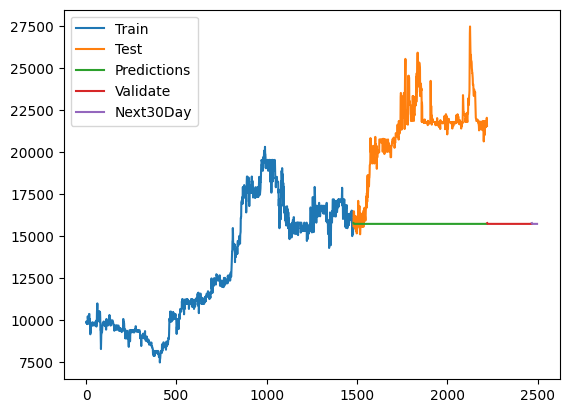

In [10]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['close'])
plt.plot(test_data.index, test_data['close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [11]:
test_data.index

RangeIndex(start=1480, stop=2220, step=1)